In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
  # Inisialisasi: Set bobot (w) dan learning rate
    def __init__(self, num_inputs, learning_rate=0.01):
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate
        self.errors_per_epoch = []

    # Fungsi Linear
    def linear(self, inputs):
        return np.dot(inputs, self.weights[1:]) + self.weights[0]

    # Fungsi Aktivasi
    def activation(self, z):
        return 1 if z >= 0 else 0

    # Prediksi
    def predict(self, inputs):
        z = self.linear(inputs)
        return self.activation(z)

    # Update bobot dengan learning rate
    def train(self, x_i, y_i):
        prediction = self.predict(x_i)
        error = y_i - prediction
        self.weights[1:] += self.learning_rate * error * x_i
        self.weights[0] += self.learning_rate * error
        return abs(error)

    # Melatih model selama beberapa epoch
    def fit(self, X, y, num_epochs=10, verbose=True):
        for epoch in range(num_epochs):
            total_error = 0
            for x_i, y_i in zip(X, y):
                total_error += self.train(x_i, y_i)
            self.errors_per_epoch.append(total_error)
            if verbose:
                print(f"Epoch {epoch+1}/{num_epochs} - Total Error: {total_error}")

    # Mengukur Akurasi Model
    def evaluate(self, X, y):
        predictions = np.array([self.predict(x_i) for x_i in X])
        return np.mean(predictions ==y)

    def plot_errors(self):
        plt.plot(self.errors_per_epoch, marker='o')
        plt.title("Total Error per Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Total Error")
        plt.grid(True)
        plt.show()

    def plot_decision_boundary(self, X, y):
        if X.shape[1] != 2:
            print("Visualisasi hanya didukung untuk data 2 dimensi.")
            return
        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        preds = np.array([self.predict(pt) for pt in grid])
        preds = preds.reshape(xx.shape)

        plt.contourf(xx, yy, preds, alpha=0.3, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
        plt.title("Decision Boundary")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.grid(True)
        plt.show()

### AND Gate

AND Gate Predictions:
[0 0] => 0
[0 1] => 0
[1 0] => 0
[1 1] => 1


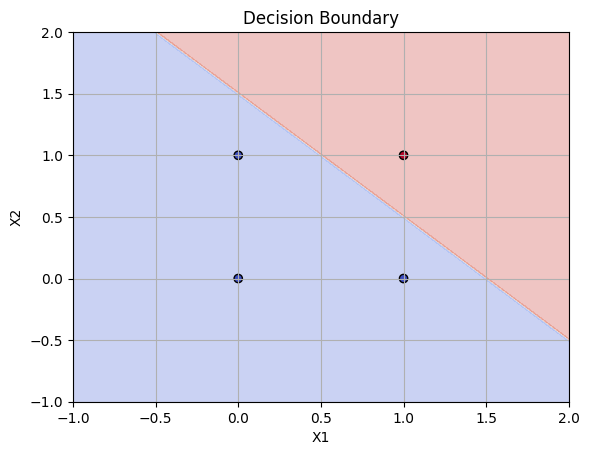

In [4]:
# Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([0, 0, 0, 1])

# Model AND
and_model = Perceptron(num_inputs=2)
and_model.weights = np.array([-1.5, 1.0, 1.0])  # b, w1, w2

# Evaluasi & Visualisasi
print("AND Gate Predictions:")
for x in X:
    print(f"{x} => {and_model.predict(x)}")

and_model.plot_decision_boundary(X, y_and)

### OR Gate

OR Gate Predictions:
[0 0] => 0
[0 1] => 1
[1 0] => 1
[1 1] => 1


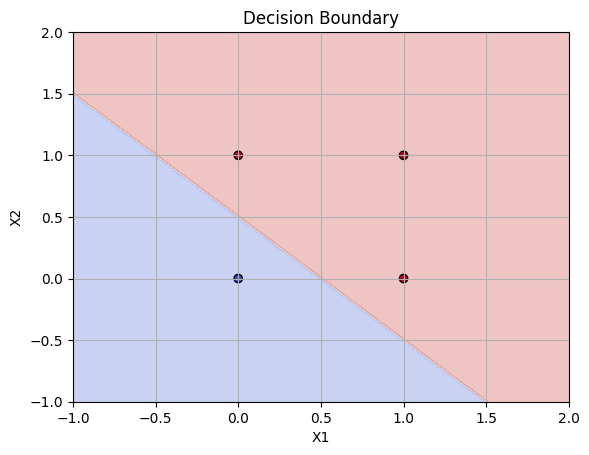

In [5]:
y_or = np.array([0, 1, 1, 1])

# Model OR
or_model = Perceptron(num_inputs=2)
or_model.weights = np.array([-0.5, 1.0, 1.0])

# Evaluasi & Visualisasi
print("OR Gate Predictions:")
for x in X:
    print(f"{x} => {or_model.predict(x)}")

or_model.plot_decision_boundary(X, y_or)

### NOT Gate

In [6]:
X_not = np.array([[0], [1]])
y_not = np.array([1, 0])

not_model = Perceptron(num_inputs=1)
not_model.weights = np.array([-0.5, 1.0])

print("NOT Gate Predictions:")
for x in X_not:
    print(f"{x} => {not_model.predict(x)}")

not_model.plot_decision_boundary(X_not, y_not)

NOT Gate Predictions:
[0] => 0
[1] => 1
Visualisasi hanya didukung untuk data 2 dimensi.
